# Iris Flower Dataset Neural Network 
##### **A Statquest implementation of [Neural Networks Part 6: Cross Entropy](https://www.youtube.com/watch?v=6ArSys5qHAU&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=12)**

![iris_dataset image.png](<./assets/iris_dataset_image.png>)

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('IRIS.csv')
iris = iris.drop(columns=["sepal_length", "petal_length"])
iris["species"] = iris["species"].str.replace("Iris-", "")
# Print 3 examples of each species
for s in iris["species"].unique():
    print(f"\n{s}:")
    print(iris[iris["species"] == s].head(3))
    print("-" * 50)


setosa:
   sepal_width  petal_width species
0          3.5          0.2  setosa
1          3.0          0.2  setosa
2          3.2          0.2  setosa
--------------------------------------------------

versicolor:
    sepal_width  petal_width     species
50          3.2          1.4  versicolor
51          3.2          1.5  versicolor
52          3.1          1.5  versicolor
--------------------------------------------------

virginica:
     sepal_width  petal_width    species
100          3.3          2.5  virginica
101          2.7          1.9  virginica
102          3.0          2.1  virginica
--------------------------------------------------


In [3]:
sample_dataset = []
# Add 5 samples from each species class
for start_idx in [0, 50, 100]:  # Starting indices for setosa, versicolor, virginica
    for i in range(5):
        sample_dataset.append(iris.iloc[start_idx + i])
sample_dataset = pd.DataFrame(sample_dataset)
print("Indices of sample_dataset:", sample_dataset.index)
print(sample_dataset)

Indices of sample_dataset: Index([0, 1, 2, 3, 4, 50, 51, 52, 53, 54, 100, 101, 102, 103, 104], dtype='int64')
     sepal_width  petal_width     species
0            3.5          0.2      setosa
1            3.0          0.2      setosa
2            3.2          0.2      setosa
3            3.1          0.2      setosa
4            3.6          0.2      setosa
50           3.2          1.4  versicolor
51           3.2          1.5  versicolor
52           3.1          1.5  versicolor
53           2.3          1.3  versicolor
54           2.8          1.5  versicolor
100          3.3          2.5   virginica
101          2.7          1.9   virginica
102          3.0          2.1   virginica
103          2.9          1.8   virginica
104          3.0          2.2   virginica


In [4]:
# input nodes
petal_width = iris["petal_width"].values
sepal_width = iris["sepal_width"].values

# Combine petal_width and sepal_width into a 2D array
X = np.column_stack((petal_width, sepal_width)) 


# output nodes
species = iris["species"].values
label_encoder = LabelEncoder()
# output nodes encoded as integers, setosa = 0, versicolor = 1, virginica = 2
species_encoded = label_encoder.fit_transform(species) 
y = species_encoded
print(y) 
print("\n" + "="* 80)
# print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



In [5]:
# Normalize the input features 0 to 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# print(X)

In [6]:
# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# print(X_tensor)
# print(y_tensor)

### Standard Implementation of a Simple Model Architecture

In [ ]:
criterion = nn.CrossEntropyLoss()
class IrirsNetSimple(nn.Module):
    def __init__(self, input_size=2, hidden_size=2, output_size=3):
        super(IrirsNetSimple, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        self.z1 = self.fc1(x)  # Linear transformation
        self.a1 = self.relu(self.z1)  # Activation
        self.z2 = self.fc2(self.a1)  # Linear transformation
        return self.z2

    def backward(self, x, y, optimizer, epoch):
        # Forward pass
        logits = self.forward(x)  # Use our forward method
        
        # Compute the loss using CrossEntropyLoss
        cross_auto = criterion(logits, y)  # Using PyTorch's built-in CrossEntropyLoss

        # Manually computing the CrossEntropyLoss
        probabilities = torch.softmax(logits, dim=1)  # Softmax activation
        one_hot_targets = torch.zeros_like(probabilities).scatter_(1, y.unsqueeze(1), 1)
        loss = -torch.sum(one_hot_targets * torch.log(probabilities)) / x.size(0)

        # Compare the two loss values
        if epoch < 1:
            print(f"CrossEntropyLoss (PyTorch): {cross_auto.item()}")
            print(f"CrossEntropyLoss (Manual): {loss.item()}")
            # Check if the two loss values are close
            assert torch.allclose(cross_auto, loss), "Loss values do not match!"
            # Print the loss
            print(f"Loss: {loss.item()}")

        # Optimizer.zero_grad() Manually below

        # Manually zero gradients for all parameters
        for param in self.parameters():
            if param.grad is not None:
                param.grad.zero_()


        loss.backward()

        # optimizer.step() Manually below

        # Manual parameter update
        for param in self.parameters(): # Adams parameter function
            # print(param) # to se the parameters
            if param.grad is not None: # Manually update the parameters with our learning rate
                param.data -= optimizer.param_groups[0]['lr'] * param.grad
        # Return the loss for logging   
        return loss.item()


In [79]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = IrirsNetSimple().to(device)

## Test the model with the sample data

In [80]:
X_sample = np.column_stack((sample_dataset["petal_width"].values,
                            sample_dataset["sepal_width"].values))
y_sample = sample_dataset["species"].values
label_encoder = LabelEncoder()
y_sample_encoded = label_encoder.fit_transform(y_sample)

X_sample = scaler.fit_transform(X_sample)

X_sample_tensor = torch.tensor(X_sample, dtype=torch.float32)
y_sample_tensor = torch.tensor(y_sample_encoded, dtype=torch.long)

print("X_sample_tensor:", X_sample_tensor)
print("y_sample_tensor:", y_sample_tensor)

X_sample_tensor: tensor([[0.0000, 0.9231],
        [0.0000, 0.5385],
        [0.0000, 0.6923],
        [0.0000, 0.6154],
        [0.0000, 1.0000],
        [0.5217, 0.6923],
        [0.5652, 0.6923],
        [0.5652, 0.6154],
        [0.4783, 0.0000],
        [0.5652, 0.3846],
        [1.0000, 0.7692],
        [0.7391, 0.3077],
        [0.8261, 0.5385],
        [0.6957, 0.4615],
        [0.8696, 0.5385]])
y_sample_tensor: tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])


In [76]:
# get train, val and test data
train_size = int(0.75 * len(X_sample_tensor))
val_size = int(0.15 * len(X_sample_tensor))
test_size = len(X_sample_tensor) - train_size - val_size

train_data, val_data, test_data = torch.utils.data.random_split( 
    list(zip(X_sample_tensor, y_sample_tensor)), [train_size, val_size, test_size]
)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=False)
# Print dataset sizes
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 11
Validation set size: 2
Test set size: 2


### Here we can see the math behind each step of the training

In [81]:
# Training loop using the model's custom backward method
learning_rate = 0.05
num_epochs = 5
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        # Call the custom backward method, which performs forward and backward passes, and updates weights
        loss = model.backward(X_batch, y_batch, optimizer, epoch)
        total_loss += loss
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")


CrossEntropyLoss (PyTorch): 1.373226284980774
CrossEntropyLoss (Manual): 1.373226284980774
Loss: 1.373226284980774
Parameter containing:
tensor([[ 0.0887,  0.6561],
        [ 0.0543, -0.1357]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0397, -0.6587], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.2380,  0.4060],
        [ 0.3807, -0.0919],
        [-0.4979, -0.6951]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.3134,  0.1753, -0.3850], device='cuda:0', requires_grad=True)
Epoch 1/5, Loss: 1.3732
Parameter containing:
tensor([[ 0.0302,  0.5969],
        [ 0.0543, -0.1357]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.1042, -0.6587], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.1879,  0.4060],
        [ 0.3233, -0.0919],
        [-0.4421, -0.6951]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.2850,  0.1107, -0.3203], device='cuda:0',

### Get probablities on the full dataset

In [10]:
import contextlib
import os

In [11]:
# Use the full dataset for probability calculation
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    with torch.no_grad():
        logits = model(X_tensor.to(device))
        probabilities = torch.softmax(logits, dim=1).cpu().numpy()

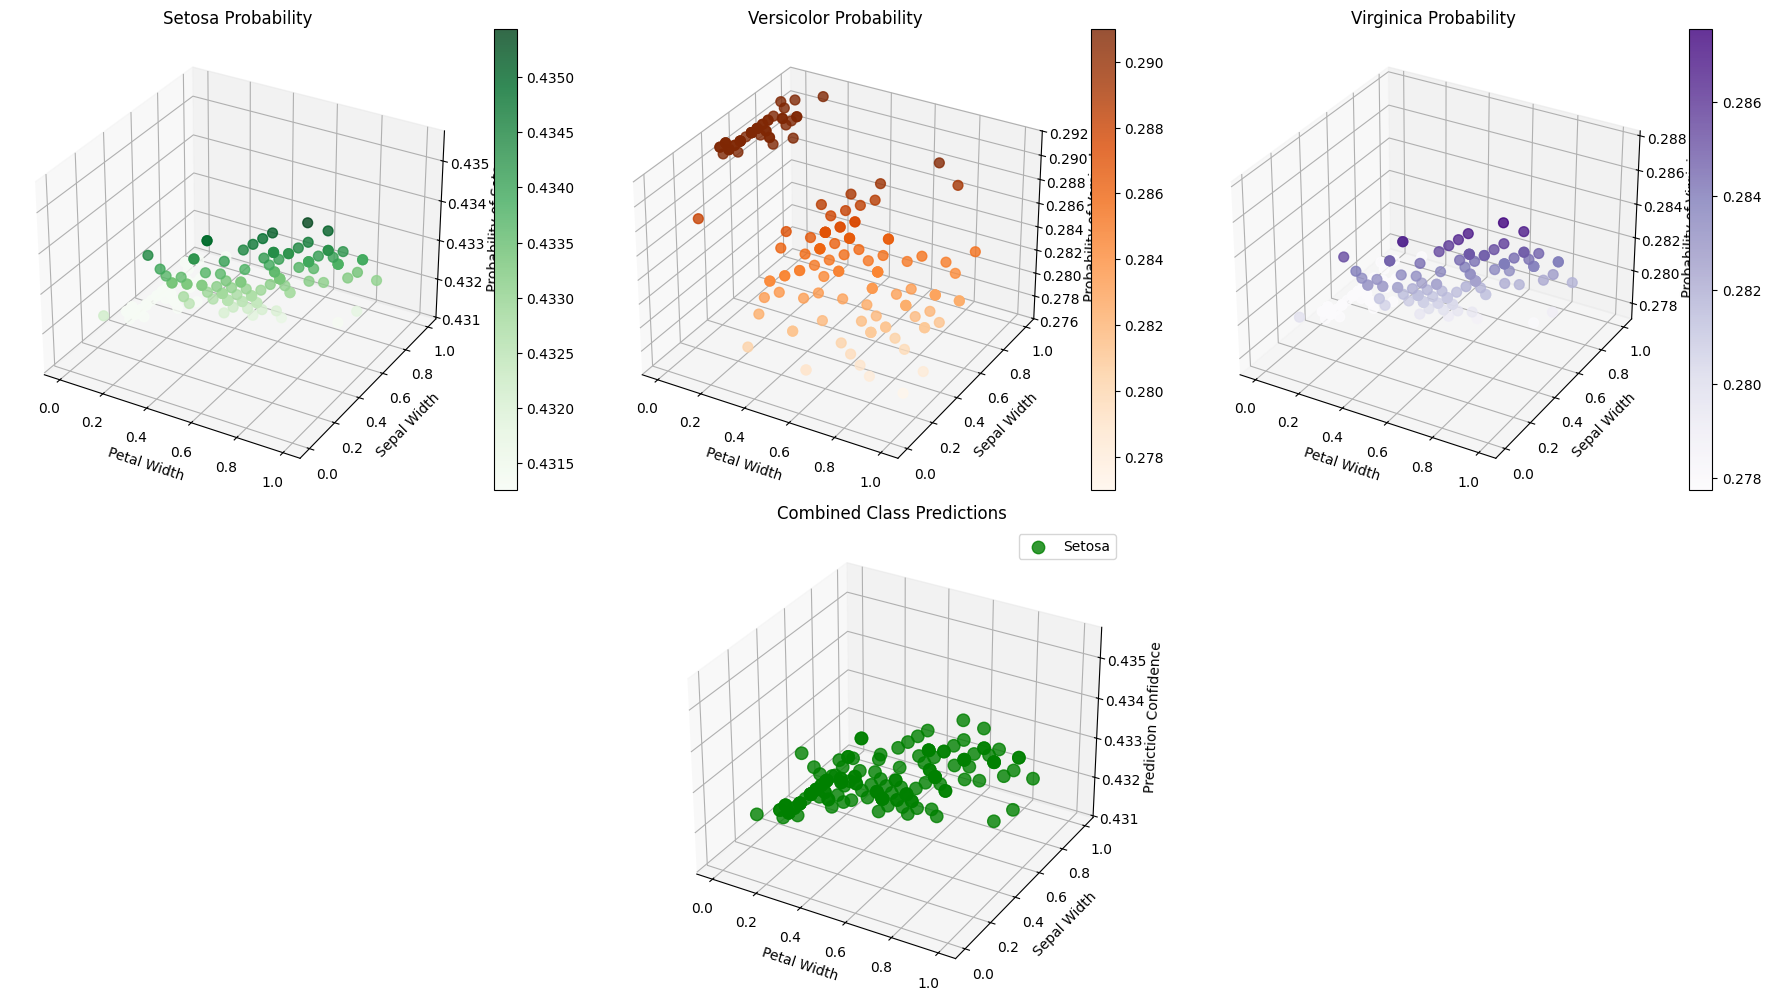

In [12]:
# Create a figure with enough space for 2 rows
fig = plt.figure(figsize=(18, 10))

# Create scatter plots for each class probability
classes = ['Setosa', 'Versicolor', 'Virginica']
cmaps = ['Greens', 'Oranges', 'Purples']
colors = ['green', 'orange', 'purple']


# --- Top row of three subplots ---
for i, (cls, cmap) in enumerate(zip(classes, cmaps)):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    
    scatter = ax.scatter(
        X[:, 0], 
        X[:, 1], 
        probabilities[:, i],
        c=probabilities[:, i],
        cmap=cmap,
        s=50,
        alpha=0.8
    )
    
    ax.set_title(f'{cls} Probability')
    ax.set_xlabel('Petal Width')
    ax.set_ylabel('Sepal Width')
    ax.set_zlabel(f'Probability of {cls}')
    
    fig.colorbar(scatter, ax=ax)

# --- Bottom row: single combined subplot spanning all columns ---
ax = fig.add_subplot(2, 3, (4, 6), projection='3d')

# Predicted class (highest probability)
predicted_class = np.argmax(probabilities, axis=1)

# Plot each point colored by predicted class
for i, cls in enumerate(classes):
    mask = predicted_class == i
    if np.any(mask):
        ax.scatter(
            X[mask, 0], 
            X[mask, 1],
            np.max(probabilities[mask], axis=1), 
            color=colors[i], 
            label=cls, 
            s=80, 
            alpha=0.8
        )

ax.set_title('Combined Class Predictions')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Prediction Confidence')
ax.legend()

plt.tight_layout()
plt.show()